In [1]:
import pandas as pd
import altair as alt
import matplotlib_venn as mplv
import seaborn as sns
import graphviz as gv

# Read data into a pandas dataframe

There is a [great number of other formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) that pandas can read (and write). I never had to use anything different then csv, excel and SQL.

All of those methods have an even greater number of optional arguments that allow you to get exactly the data you want from the datasource.

In [2]:
# choose your data source
raw_data = pd.read_csv("data/Pokemon.csv",
                       sep=',' # optional
                      )
raw_data = pd.read_excel('data/Pokemon.xlsx',
                         sheet_name='Pokemon' # optional
                        )

You might need to change data around or parse some strange date format. Specify the date format like for [strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [3]:
# apply a (lambda) function to a collumn
# raw_data['Date Time'] = raw_data['Date Time'].apply(lambda string_in_cell : string_in_cell.split('-')[0])

# parse some wired date format
# raw_data['Date Time'] = pd.to_datetime(raw_data['Date Time'], format='%d.%m.%Y %H:%M:%S ')

## Take a first look at the data

In [4]:
raw_data.head() # first 5 lines

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [5]:
raw_data.describe() # some statistics

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

# Plot the data

[Some nice inspirations for graphs](https://python-graph-gallery.com/)

## Plotting with altair

[Example Gallery](https://altair-viz.github.io/gallery/index.html)

Altair is great for interactive plots, sane defaults and work with time data. You can get very much with very little code. Altair draws it's powers from [Vega](https://vega.github.io/).

In [6]:
sorted_barchart = alt.Chart(raw_data).mark_bar().encode(
    x=alt.X('Type 1:N', sort='-y'),
    y='count()',
    color='Generation:N',
)
sorted_barchart

alt.Chart(...)

In [7]:
barchart = alt.Chart(raw_data).mark_bar().encode(
    x='Legendary',
    y='count()',
    color='Legendary'
)
barchart

alt.Chart(...)

In [8]:
scatterplot = alt.Chart(raw_data).mark_circle().encode(
    x='Attack',
    y='Defense',
    color='Legendary'
)
scatterplot

alt.Chart(...)

### Interactive plots

Select points on the left, see more detailed statistics on the right. You can also drag the selection around. So cool.

In [9]:
brush = alt.selection(type='interval')

scatterplot.add_selection(brush) | barchart.transform_filter(brush)

alt.HConcatChart(...)

#### saving altair graphs

In [10]:
sorted_barchart.save("sorted_barchart.html")

In [11]:
# some formats need the selenium package installed since they are converted from html to svg/png
sorted_barchart.save("sorted_barchart.svg")
sorted_barchart.save("sorted_barchart.png")

## Plotting with seaborn

[Example Gallery](https://seaborn.pydata.org/examples/index.html)

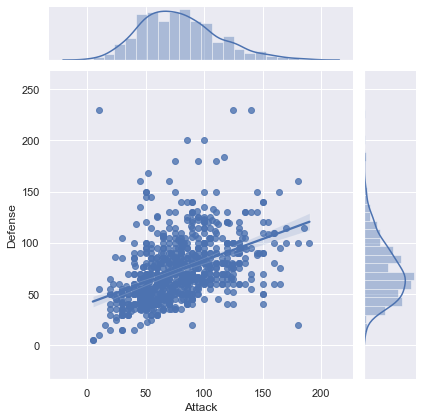

In [12]:
sns.set(style="darkgrid")
jointplot = sns.jointplot("Attack",
                          "Defense",
                          data=raw_data,
                          kind="reg")

## Plotting with matplotlib

[I only use this for Venn Diagramms](https://github.com/konstantint/matplotlib-venn), matplotlib tends to get complicated and verbose.

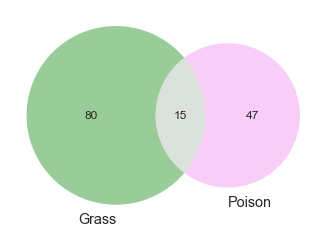

In [13]:
grass_pokemon  = raw_data[(raw_data['Type 1'] == 'Grass')  | (raw_data['Type 2'] == 'Grass') ]
poison_pokemon = raw_data[(raw_data['Type 1'] == 'Poison') | (raw_data['Type 2'] == 'Poison')]

venn_diagramm = mplv.venn2(subsets=[set(grass_pokemon.Name),
                                    set(poison_pokemon.Name),
                                   ],
                           set_labels=('Grass', 'Poison'),
                           set_colors=('green', 'violet')
)

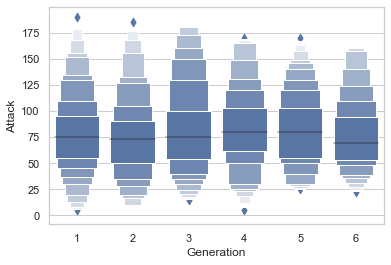

In [14]:
sns.set(style="whitegrid")
sns.boxenplot("Generation",
              "Attack",
              data=raw_data,
              color="b",
              scale="linear")

# Graphs with Graphviz

[Graphviz](https://www.graphviz.org/) is a program to draw graphs (with nodes and edges) from simple text files. We can generate those graphs from code which allows us to visualize our data in a way that isn't possible with most plotters.

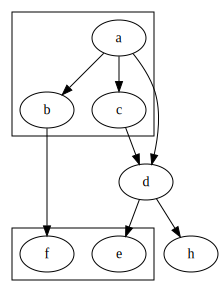

In [15]:
g = gv.Digraph('G', filename='cluster_edge.gv')
g.attr(compound='true')

# Define the nodes and which clusters they are in (optional)
with g.subgraph(name='cluster0') as c:
    c.node('a')
    c.node('b')
    c.node('c')
c.node('d')
with g.subgraph(name='cluster1') as c:
    c.node('e')
    c.node('f')

# Add the edges
g.edge('a', 'b')
g.edge('a', 'c')
g.edge('a', 'd')
g.edge('b', 'f')
g.edge('c', 'd')
g.edge('d', 'e')
g.edge('d', 'h')

g

In [16]:
g = gv.Digraph('G')
for pokemon_1 in raw_data['Name']:
    for pokemon_2 in raw_data['Name']:
        if pokemon_1 in pokemon_2 and not pokemon_1 == pokemon_2: # pokemon_1's name is a strict subname of pokemon_2's name.
            g.edge(pokemon_1, pokemon_2)
g